# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 70px; font-weight: bold;">Leaf Disease Prediction</span>

# <span style="color:#82b74b; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Multiclass Classification Problem</span>

In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import os

In [2]:
# Disable Jedi autocompletion for the current session
%config Completer.use_jedi = False

In [3]:
# Display GPU or CPU information using the nvidia-smi command
!nvidia-smi

Wed Aug 23 18:33:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   43C    P8     7W /  N/A |    626MiB /  6144MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Import the PyTorch library
import torch

# Print the version of the imported PyTorch library
print("PyTorch version:", torch.__version__)

PyTorch version: 2.0.1+cpu


In [6]:
# Upgrade the fastai library if necesarry using pip
!pip install --upgrade fastai

In [6]:
# Import the fastai library
import fastai

# Print the version of the imported fastai library
print("fastai version:", fastai.__version__)

fastai version: 2.7.12


In [8]:
# Import necessary modules from the fastai library for computer vision tasks
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Import dataset</span>

In [10]:
# Set the environment variable 'KAGGLE_CONFIG_DIR' to '/content'
# This specifies the directory where Kaggle API configuration files are located
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [11]:
# Download a Kaggle dataset
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:21<00:00, 168MB/s]
100% 2.70G/2.70G [00:21<00:00, 133MB/s]


In [43]:
# Unzip and remove zip files using shell commands
!unzip \*.zip && rm*zip

Archive:  new-plant-diseases-dataset.zip
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
# Define a variable to store the path to a dataset directory
data_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [18]:
# Define data transformations and create ImageDataLoaders from a folder
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)  # Transformation for individual items
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]  # Transformation for batches

# Create ImageDataLoaders using specified data transformations
data = ImageDataLoaders.from_folder(data_path, 
                                    item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch,
                                    valid_pct=0.15, 
                                    shuffle=True)

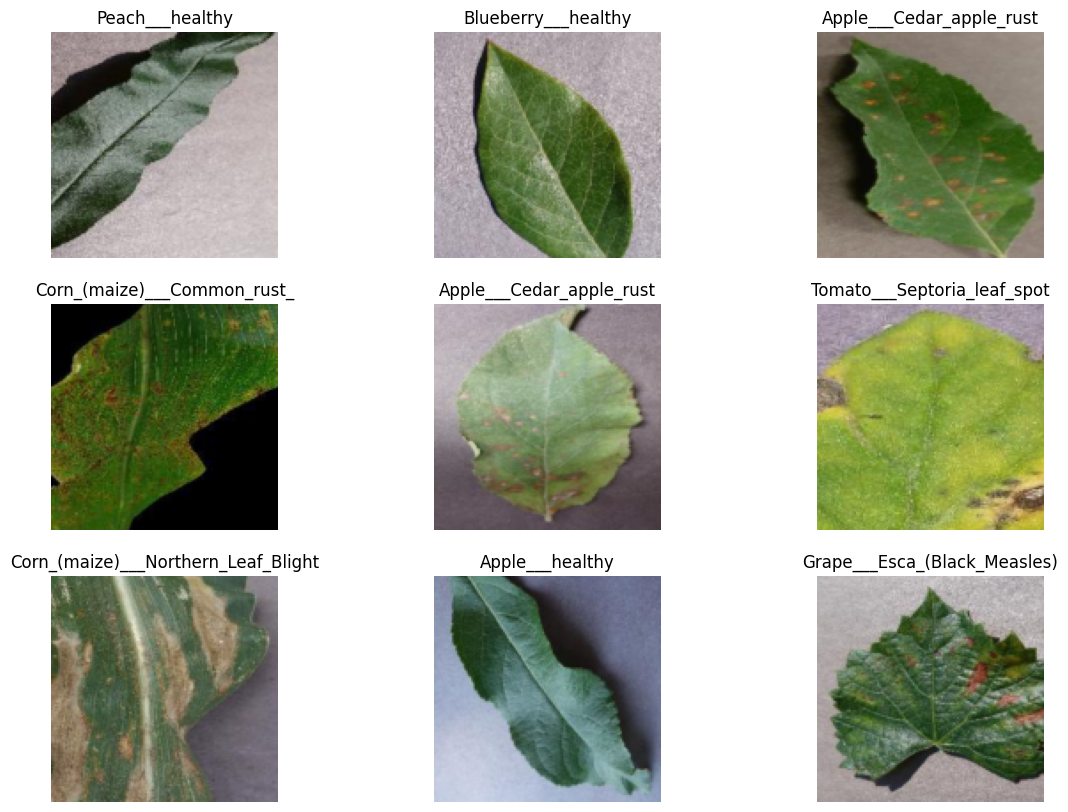

In [19]:
# Display a batch of images from the dataset
data.show_batch(figsize=(14, 10))

In [20]:
# Print the number of classes in the dataset
print('Number of classes:', data.c)

Number of classes 38


# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Modeling</span>

In [22]:
# Create a vision model using the fastai library
model = vision_learner(data, resnet101, metrics=accuracy, model_dir='/tmp/model/')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
# Display a summary of the model's architecture and parameters
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                        

SuggestedLRs(valley=0.0005754399462603033)

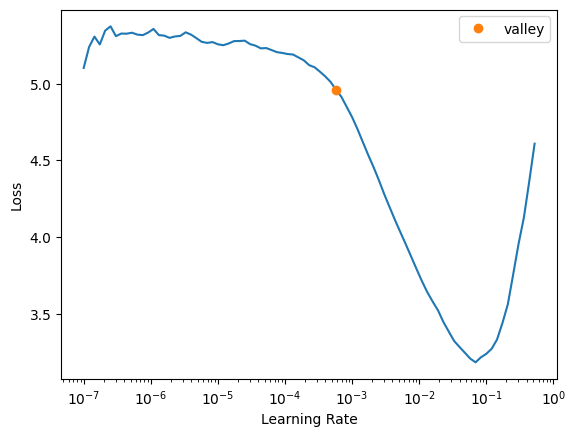

In [23]:
# Find an optimal learning rate using the learning rate finder
model.lr_find()

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Fitting the model</span>

In [26]:
# Train the model using the fit_one_cycle method
# Parameters:
# - 3: Number of epochs (complete passes through the training data)
# - 0.0005: Base learning rate for the cyclical learning rate schedule
model.fit_one_cycle(3, 0.0005)

epoch,train_loss,valid_loss,accuracy,time
0,0.163197,0.066890,0.978149,05:53
1,0.076670,0.052932,0.986874,05:50
2,0.050707,0.040325,0.990592,05:49


In [28]:
# Save the trained model
model.save('my_model.pkl')

Path('/tmp/model/my_model.pkl.pth')

# <span style="color:#405d27; font-family: Trebuchet MS; font-size: 40px; font-weight: bold;">Evaluation</span>

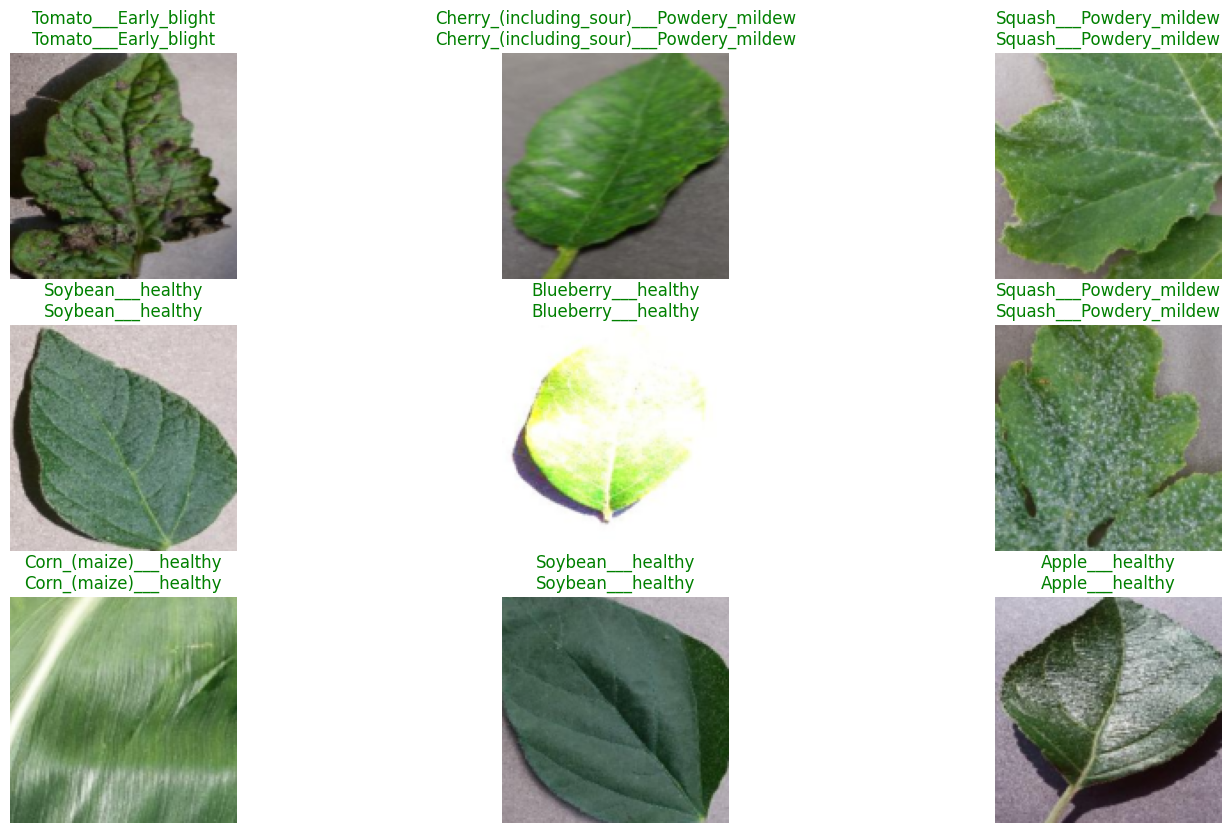

In [32]:
# Show the results of the model's predictions
model.show_results(figsize = (18, 10))

In [33]:
# Create an Interpretation object to analyze model predictions
interp = Interpretation.from_learner(model)

In [35]:
# Create a ClassificationInterpretation object to analyze model predictions
interp2 = ClassificationInterpretation.from_learner(model)

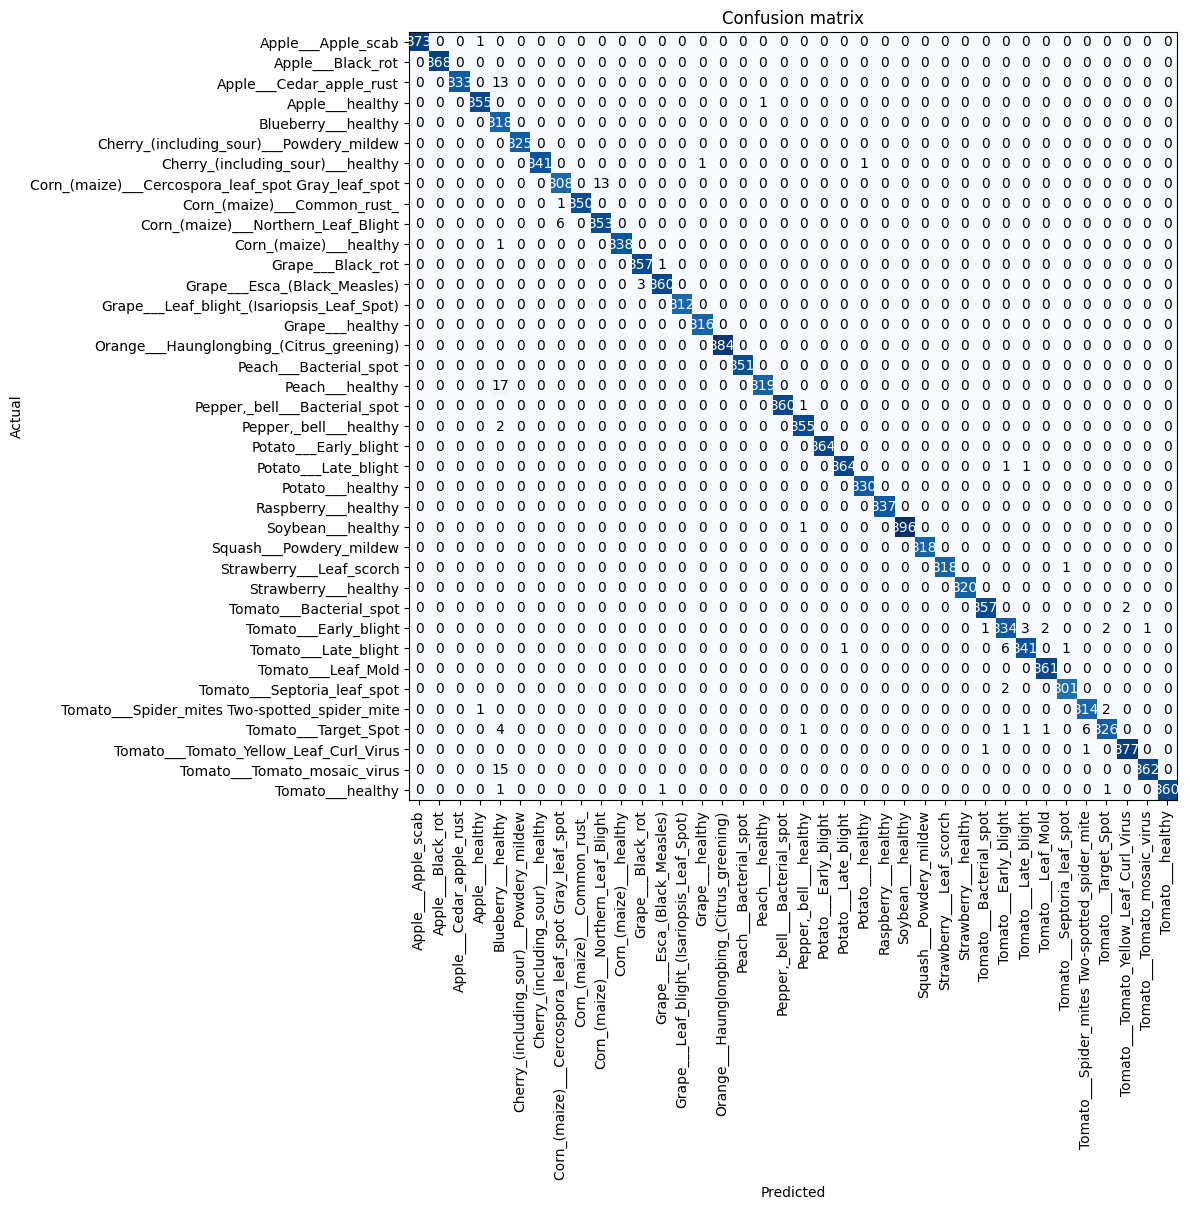

In [37]:
# Plot a confusion matrix to visualize model's classification performance
interp2.plot_confusion_matrix(figsize = (12, 12), dpi = 100)

In [38]:
# Find and display the classes that are most commonly confused by the model
interp2.most_confused(min_val = 2)

[('Peach___healthy', 'Blueberry___healthy', 17),
 ('Tomato___Tomato_mosaic_virus', 'Blueberry___healthy', 15),
 ('Apple___Cedar_apple_rust', 'Blueberry___healthy', 13),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  13),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 6),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 6),
 ('Tomato___Target_Spot', 'Blueberry___healthy', 4),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 3),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 3),
 ('Pepper,_bell___healthy', 'Blueberry___healthy', 2),
 ('Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 2),
 ('Tomato___Early_blight', 'Tomato___Leaf_Mold', 2),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 2),
 ('Tomato___Spider_mite

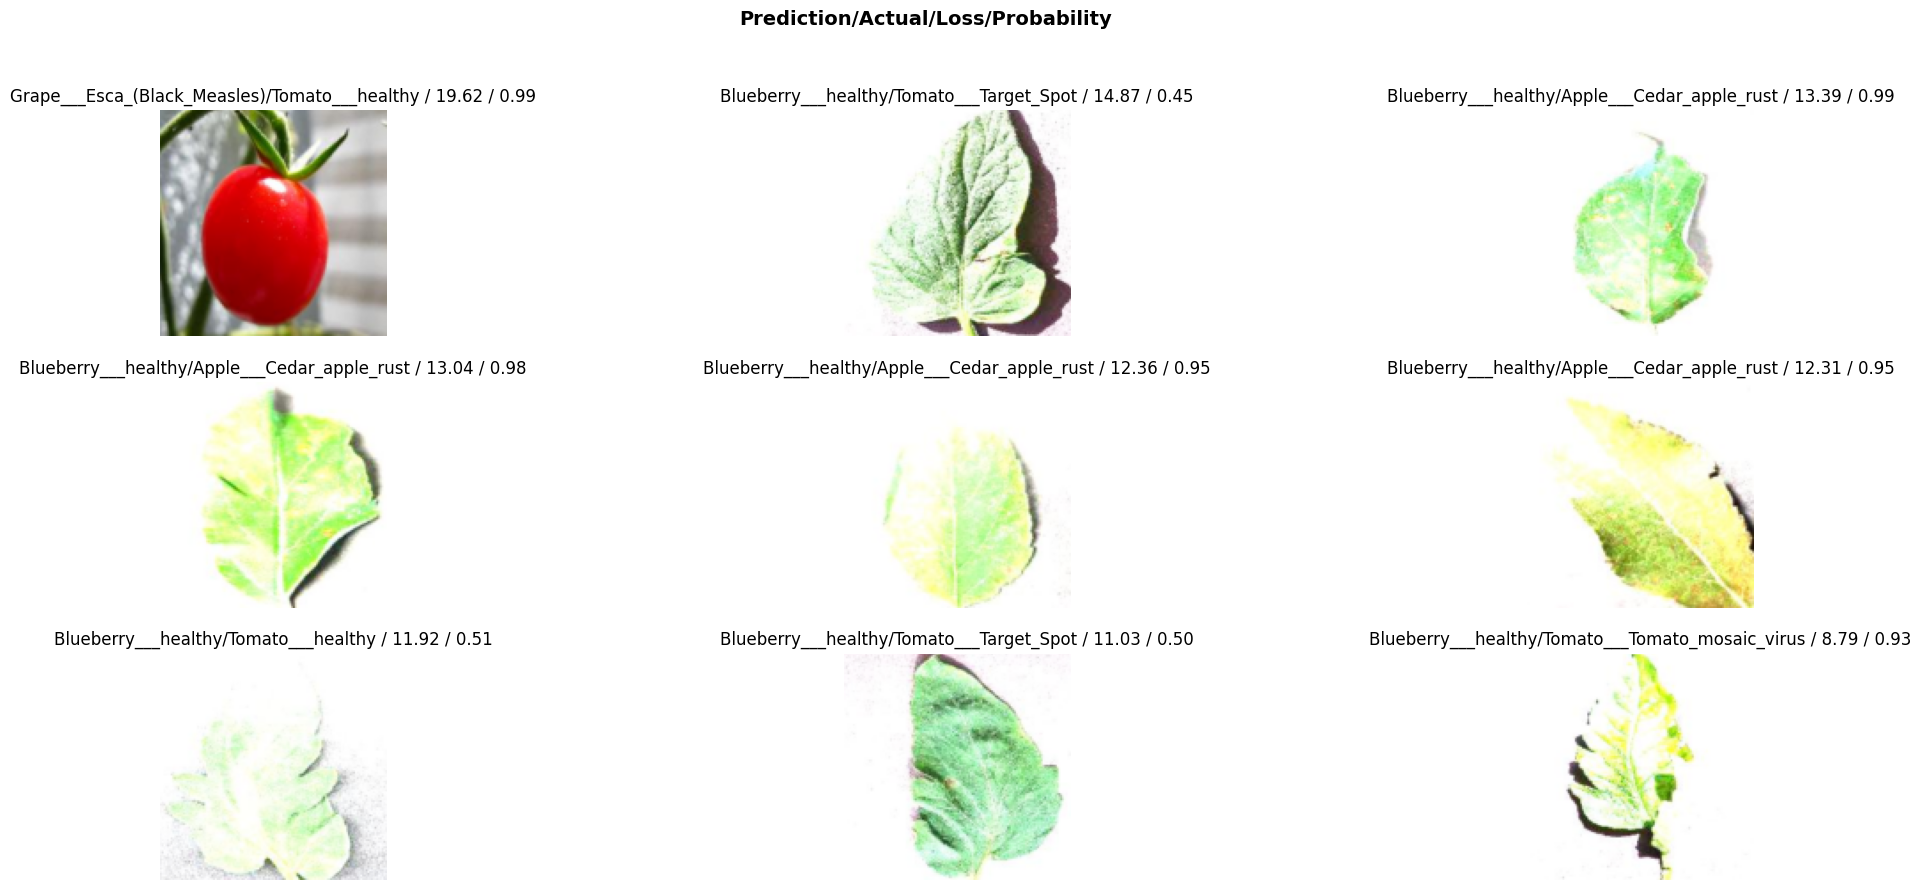

In [42]:
# Plot the top loss examples to visualize instances where the model's predictions were most incorrect
interp.plot_top_losses(9, figsize = (25, 10))